In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
np.random.seed(1)
data=np.round(10*np.random.normal(0,1,11),0).astype(int)

print(np.sort(data))
min_dev=1000
median=data[0]

for i in data:
    iter_dev=sum(np.abs(data-i))
    
    if (iter_dev<min_dev):
        min_dev=iter_dev
        median=i
    
median

[-23 -11  -8  -6  -5  -2   3   9  15  16  17]


-2

In [3]:
X=np.random.normal(0,1,100)
Y=np.random.normal(0,1,100)

df=pd.DataFrame(np.vstack((X,Y)).transpose(),columns=['X','Y'])
df.head()

,X,Y
0,-2.060141,0.315159
1,-0.322417,0.846161
2,-0.384054,-0.859516
3,1.133769,0.350546
4,-1.099891,-1.312283


In [4]:
def gradient(X,Y,w,b):
    dw = sum((Y-w*X-b)*(-X)/np.abs(Y-w*X-b))
    db = sum((Y-w*X-b)*(-1)/np.abs(Y-w*X-b))
    return dw, db
    
def get_loss(X,Y,w,b):
    return sum(np.abs(Y-w*X-b))

def linear_regression(X,Y,w_init, b_init, alpha, beta, n_iterations):
    
    w=w_init
    b=b_init
    
    W=[]
    B=[]
    COSTS=[]
    for _ in range(n_iterations):
        
        dw, db = gradient(X,Y,w,b)
        
        w=w-alpha*dw
        b=b-beta*db
        
        cost=get_loss(X,Y,w,b)
        
        W.append(w)
        B.append(b)
        COSTS.append(cost)
        
    return W, B, COSTS

n_iterations=100
w_init=np.random.normal(0,1,1)
b_init=np.random.normal(0,1,1)
alpha=10E-3
beta=10E-3

W, B, COSTS=linear_regression(X,Y,w_init, b_init, alpha, beta, n_iterations)

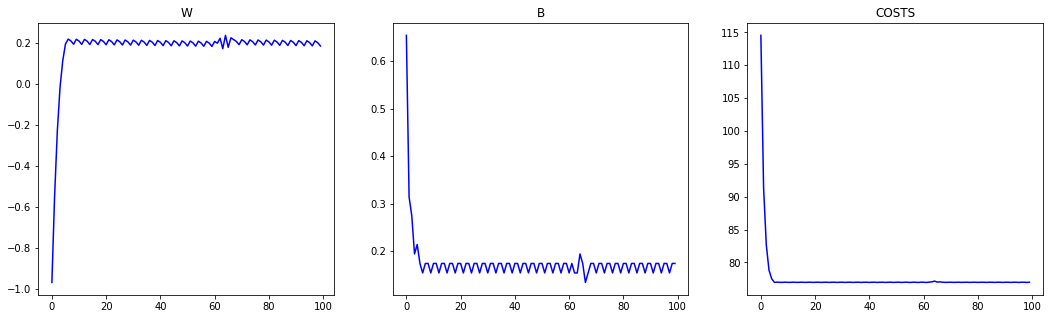

In [5]:
fig=plt.figure(figsize=(18,5))

plt.subplot(131)
plt.title('W')
plt.plot(W,c='b')

plt.subplot(132)
plt.title('B')
plt.plot(B,c='b')

plt.subplot(133)
plt.title('COSTS')
plt.plot(COSTS,c='b')
plt.show()